In [22]:
# Load data.
from METCOMP_utils import *
station_ids = ['40013','40010','25754','40003','24768','40005','23470','25786','24856','23658','40004','23659','25652','20949','40145','40007','40143','22234']

# param_dict: Dictionary translating SMHI parameter names to corresponding parameters in reference.
#             Example: param_dict = {'t': 'ref_temperature', 'prec1h': 'ref_precipitation', ...}
param_dict = {'t': 'TM', 'prec1h': 'RR', 'r': 'UM', 'ws': 'FM2'}

start_date = datetime.date(2017, 3, 1)
end_date = datetime.date(2020, 2, 29)
MESAN_data = {}
LANTMET_data = {}
for station in station_ids:
    print('Loading ' + station + '...')
    MESAN_data[station] = read_CSV(station, 'MESAN', start_date, end_date)
    LANTMET_data[station] = read_CSV(station, 'LANTMET', start_date, end_date)

# Unit conversion if needed.
for station in station_ids:
    LANTMET_data[station][param_dict['r']] = LANTMET_data[station][param_dict['r']]/100

Loading 40013...
Loading 40010...
Loading 25754...
Loading 40003...
Loading 24768...
Loading 40005...
Loading 23470...
Loading 25786...
Loading 24856...
Loading 23658...
Loading 40004...
Loading 23659...
Loading 25652...
Loading 20949...
Loading 40145...
Loading 40007...
Loading 40143...
Loading 22234...


Working on 40013...
Working on 40010...
Working on 25754...
Working on 40003...
Working on 24768...
Working on 40005...
Working on 23470...
Working on 25786...
Working on 24856...
Working on 23658...
Working on 40004...
Working on 23659...
Working on 25652...
Working on 20949...
Working on 40145...
Working on 40007...
Working on 40143...
Working on 22234...


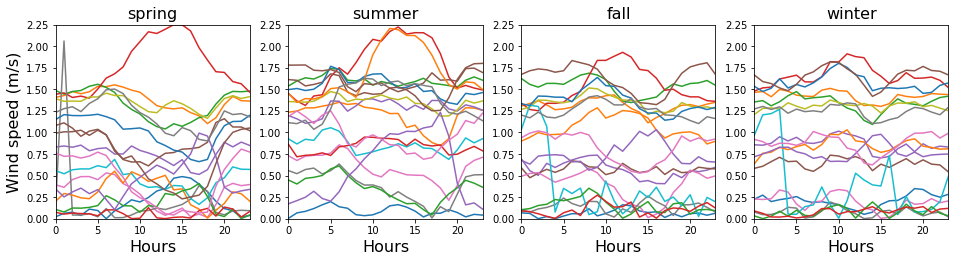

In [34]:
import matplotlib.pyplot as plt
import numpy as np

param = 't'
# param_dict: Dictionary translating SMHI parameter names to corresponding parameters in reference.
#             Example: param_dict = {'t': 'ref_temperature', 'prec1h': 'ref_precipitation', ...}
param_dict = {'t': 'TM', 'prec1h': 'RR', 'r': 'UM', 'ws': 'FM2'}
seasons = {'spring': [3, 4, 5], 'summer': [6, 7, 8], 'fall': [9, 10, 11], 'winter': [12, 1, 2]}
stations = ['40013','40010','25754','40003','24768','40005','23470','25786','24856','23658','40004','23659','25652','20949','40145','40007','40143','22234']


ylims = []
fig, axs = plt.subplots(1, 4, figsize = (16, 16))
for station in stations:
    
    print('Working on ' + station + '...')
    
    df_MESAN = MESAN_data[station]
    df_LANTMET = LANTMET_data[station]
    
    MESAN_months = divide_months(df_MESAN)
    LANTMET_months = divide_months(df_LANTMET)
    
    index = 0
    for season in seasons:
        
        # Get season dataframe.
        MESAN_season = None
        LANTMET_season = None
        for month in seasons[season]:
            MESAN_season = pd.concat([MESAN_season, MESAN_months[month]], axis=0, ignore_index=True)
            LANTMET_season = pd.concat([LANTMET_season, LANTMET_months[month]], axis=0, ignore_index=True)
        
        MESAN_hours = divide_hours(MESAN_season)
        LANTMET_hours = divide_hours(LANTMET_season)
        
        hours = [h for h in range(0, 24)]
        avg_day_error = []
        for hour in hours:
            tmp_MESAN = MESAN_hours[hour][param].mean(skipna=True)
            tmp_LANTMET = LANTMET_hours[hour][param_dict[param]].mean(skipna=True)
            avg_day_error.append(abs(tmp_MESAN - tmp_LANTMET))
        
        
        #print(avg_day_error)
        
        if param == 'r':
            avg_day_error = np.array(avg_day_error)*100
        ylims.append(max(avg_day_error))
        axs[index].plot(hours, avg_day_error)
        
        index = index + 1

index = 0
for season in seasons:
    
        axs[index].set_xlabel('Hours', fontsize=16)
        axs[index].set_title(season, fontsize=16)
        axs[index].set_xlim([0, 23])
        axs[index].set_ylim([0, max(ylims)])
        x0,x1 = axs[index].get_xlim()
        y0,y1 = axs[index].get_ylim()
        axs[index].set_aspect(abs(x1-x0)/abs(y1-y0))
        
        index = index + 1
    
if param == 't':
    axs[0].set_ylabel('Temperature (°C)', fontsize=16)
if param == 'r':
    axs[0].set_ylabel('Relative humidity (%)', fontsize=16)
if param == 'prec1h':
    axs[0].set_ylabel('Precipitation (mm)', fontsize=16)
if param == 'ws':
    axs[0].set_ylabel('Wind speed (m/s)', fontsize=16)
        